In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DotMap(objective=array([-0.122568  ,  0.08666316,  0.23622227,  0.34530655], dtype=float32), surrogate=array([0.632028  , 0.79569143, 0.9066259 , 0.9820703 ], dtype=float32), theta_0=array([0.882     , 0.86436   , 0.8470728 , 0.83013135], dtype=float32), theta_1=array([0.738     , 0.60516   , 0.4962312 , 0.40690958], dtype=float32))

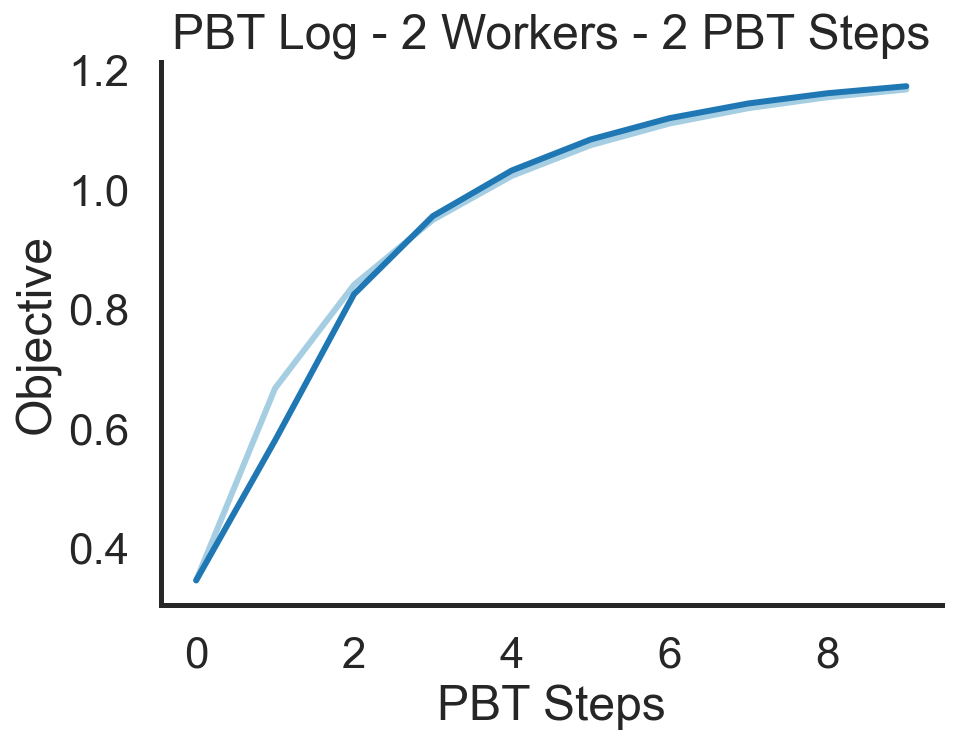

In [17]:
from mle_toolbox.experimental.pbt import load_pbt_log

pbt_dir = "examples/experiments/pbt/run_test/"
pbt_log = load_pbt_log(pbt_dir, "../")
pbt_log.plot_worker_perf()
pbt_log.worker_logs.worker_0.step_0.stats

# Inspect Dynamics of Hyperparameters

In [25]:
pbt_log.worker_logs.worker_0.step_9.stats.theta_0

array([0.20321335, 0.19472924, 0.18659934, 0.17880888], dtype=float32)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

all_theta_0_w0 = []
all_theta_1_w0 = []

for i in range(10):
    all_theta_0_w0.append(pbt_log.worker_logs.worker_0["step_"+str(i)].stats.theta_0)
    all_theta_1_w0.append(pbt_log.worker_logs.worker_0["step_"+str(i)].stats.theta_1)
    
all_theta_0_w0 = np.concatenate(all_theta_0_w0)
all_theta_1_w0 = np.concatenate(all_theta_1_w0)
    
all_theta_0_w1 = []
all_theta_1_w1 = []

for i in range(10):
    all_theta_0_w1.append(pbt_log.worker_logs.worker_1["step_"+str(i)].stats.theta_0)
    all_theta_1_w1.append(pbt_log.worker_logs.worker_1["step_"+str(i)].stats.theta_1)
    
all_theta_0_w1 = np.concatenate(all_theta_0_w1)
all_theta_1_w1 = np.concatenate(all_theta_1_w1)

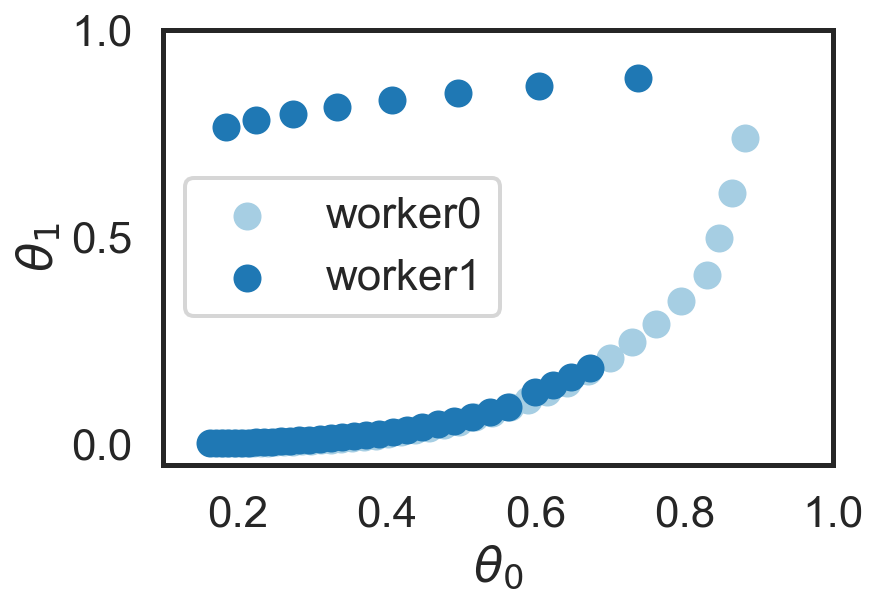

In [30]:
fig, ax = plt.subplots()
ax.scatter(all_theta_0_w0, all_theta_1_w0, label="worker0")
ax.scatter(all_theta_0_w1, all_theta_1_w1, label="worker1")
ax.set_xlim(0.1, 1)
ax.set_ylim(-0.05, 1)
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.legend()